In [ ]:
import numpy as np
import pandas as pd
import gc
gc.enable()
EPOCH=50
EPOCHS=EPOCH
SIZE_IMAGE=128
import time
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
all_df=pickle.load( open( "X_dataframe_post_processing.pkl", "rb" ) )

In [3]:
weird_data=all_df['Year Made'] <= 1500

In [4]:
# all_df.loc[weird_data, 'Year Made']=all_df.loc[weird_data, 'Year Made']*2
all_df.loc[weird_data, 'Year Made']=2021

In [5]:
# type(all_df['Image Array'].iloc[0])
tier = []
for row in all_df['Current Value']:
    if row <10000:    tier.append('Cheap or Trade')
    elif row < 50000:  tier.append('Proffesional')
    else:  tier.append('Collectors')
# Create a column from the list
all_df['Tier'] = tier

In [6]:
all_df.shape

(8429, 6)

In [7]:
all_df = all_df[all_df['Current Value'].isnull()==False]

In [8]:
all_strings=all_df.loc[(all_df['Instrument Type'] != 'Violin Bow') & (all_df['Instrument Type'] != 'Cello Bow')& (all_df['Instrument Type'] != 'Bass Bow')& (all_df['Instrument Type'] != 'Viola Bow')]

In [10]:
all_strings.head

<bound method NDFrame.head of      Instrument Type    Country Made  Year Made  Current Value  \
0             Violin           Italy     1985.0           5823   
1              Cello           Italy     1994.0          27526   
9              Viola  United Kingdom     1820.0          96505   
10             Cello  United Kingdom     1800.0          49155   
11             Cello  United Kingdom     1800.0          50440   
...              ...             ...        ...            ...   
8421          Violin   United States     1934.0          55599   
8422          Violin   United States     1935.0          46015   
8423          Violin   United States     1948.0          39839   
8424          Violin   United States     1952.0          24735   
8425          Violin   United States     1960.0          21600   

                                            Image Array            Tier  
0     [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...  Cheap or Trade  
1     [[[1.0, 1.0, 1.0], [1.0

## Data Augmentation Begin

In [11]:
# importing the libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [12]:
x=np.stack(all_strings['Image Array'].values.tolist(), axis=0)
# y=np.asarray(processed_df['Current Value'])
y=np.asarray(all_strings['Tier'])

In [13]:
split = train_test_split( x, y , test_size=0.10, random_state=32)
# (x_test, y_test, x_train, y_train)=split
( train_images, test_images, train_labels, test_labels)=split

In [14]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(6752, 128, 128, 3)
(751, 128, 128, 3)
(6752,)
(751,)


In [15]:
train_labels = pd.get_dummies(train_labels)

In [16]:
test_labels = pd.get_dummies(test_labels)

In [17]:
# defining the model architecture
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(SIZE_IMAGE, SIZE_IMAGE, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))

In [18]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 4)       112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 4)         148       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 10803     
Total params: 11,063
Trainable params: 11,063
Non-trainable params: 0
____________________________________________________

In [20]:
# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
#Model 1 Categorizer no Image Generation
history = model.fit(train_images, train_labels, epochs=EPOCH, validation_data=(test_images, test_labels))


Epoch 1/25
211/211 [==============================] - 22s 105ms/step - loss: 0.7579 - accuracy: 0.6440 - val_loss: 0.8543 - val_accuracy: 0.5752
Epoch 2/25
211/211 [==============================] - 31s 145ms/step - loss: 0.7231 - accuracy: 0.6645 - val_loss: 0.8461 - val_accuracy: 0.5952
Epoch 3/25
211/211 [==============================] - 39s 186ms/step - loss: 0.6987 - accuracy: 0.6829 - val_loss: 0.8384 - val_accuracy: 0.5899
Epoch 4/25
211/211 [==============================] - 39s 183ms/step - loss: 0.6736 - accuracy: 0.6909 - val_loss: 0.8488 - val_accuracy: 0.6019
Epoch 5/25
211/211 [==============================] - 38s 181ms/step - loss: 0.6555 - accuracy: 0.7033 - val_loss: 0.8633 - val_accuracy: 0.5779
Epoch 6/25
211/211 [==============================] - 39s 184ms/step - loss: 0.6336 - accuracy: 0.7198 - val_loss: 0.8987 - val_accuracy: 0.5699
Epoch 7/25
211/211 [==============================] - 38s 178ms/step - loss: 0.6209 - accuracy: 0.7257 - val_loss: 0.8857 - val_ac

## Categorizer with ImageDataGenerator

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=.01,
    width_shift_range=0.02,
    height_shift_range=0.03,
    brightness_range=None,
    shear_range=0.01,
    zoom_range=0.01,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [48]:
it = datagen.flow(train_images, train_labels)

In [62]:
BS=32
H = model.fit_generator(it,
validation_data=(test_images, test_labels), steps_per_epoch=len(train_images) // BS,
epochs=EPOCHS)
# model.fit_generator(it, steps_per_epoch=313, epochs=4, validation_data=(test_images, test_labels))

Epoch 1/50
211/211 [==============================] - 28s 131ms/step - loss: 0.8395 - accuracy: 0.5837 - val_loss: 0.9448 - val_accuracy: 0.5619
Epoch 2/50
211/211 [==============================] - 36s 170ms/step - loss: 0.8357 - accuracy: 0.5933 - val_loss: 0.9125 - val_accuracy: 0.5672
Epoch 3/50
211/211 [==============================] - 38s 180ms/step - loss: 0.8260 - accuracy: 0.5961 - val_loss: 0.9043 - val_accuracy: 0.5739
Epoch 4/50
211/211 [==============================] - 41s 195ms/step - loss: 0.8158 - accuracy: 0.6060 - val_loss: 0.9182 - val_accuracy: 0.5632
Epoch 5/50
211/211 [==============================] - 46s 219ms/step - loss: 0.8087 - accuracy: 0.6100 - val_loss: 0.9148 - val_accuracy: 0.5792
Epoch 6/50
211/211 [==============================] - 52s 248ms/step - loss: 0.8034 - accuracy: 0.6145 - val_loss: 0.8973 - val_accuracy: 0.5739
Epoch 7/50
211/211 [==============================] - 56s 266ms/step - loss: 0.8075 - accuracy: 0.6090 - val_loss: 0.8818 - val_ac

In [63]:
from tensorflow.keras.models import load_model
model.save('image_classification.h5')

In [73]:
model_saved=H

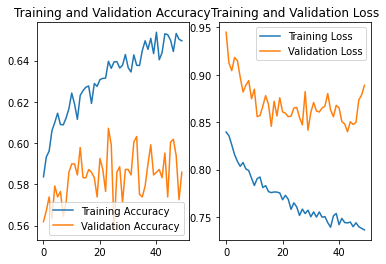

<Figure size 432x288 with 0 Axes>

In [75]:
acc = model_saved.history['accuracy']
val_acc = model_saved.history['val_accuracy']
loss = model_saved.history['loss']
val_loss = model_saved.history['val_loss']
epochs_range = range(EPOCHS)

# plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# plt.ylim(.57,.69)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
# plt.ylim(.7,1)

plt.show()
plt.savefig('Training and Validation Accuracy and Loss.png')

In [65]:
predictions = model.predict(test_images)

In [66]:
np.set_printoptions(precision=2)
for violin in range(3):
    print('Expected: {}, \nPredicted{} \n'.format(test_labels.iloc[violin].to_numpy(), predictions[violin] ))

Expected: [1 0 0], 
Predicted[0.62 0.01 0.37] 

Expected: [1 0 0], 
Predicted[0.37 0.07 0.56] 

Expected: [1 0 0], 
Predicted[0.01 0.81 0.17] 



In [67]:
columns_ordered=['Cheap or Trade', 'Proffesional', 'Collectors']
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(columns_ordered[predicted_label],
                                100*np.max(predictions_array),
                                columns_ordered[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [68]:
index_list=[]
for x in range(test_labels.shape[0]):
    index_list.append(test_labels.values.tolist()[x].index(1))

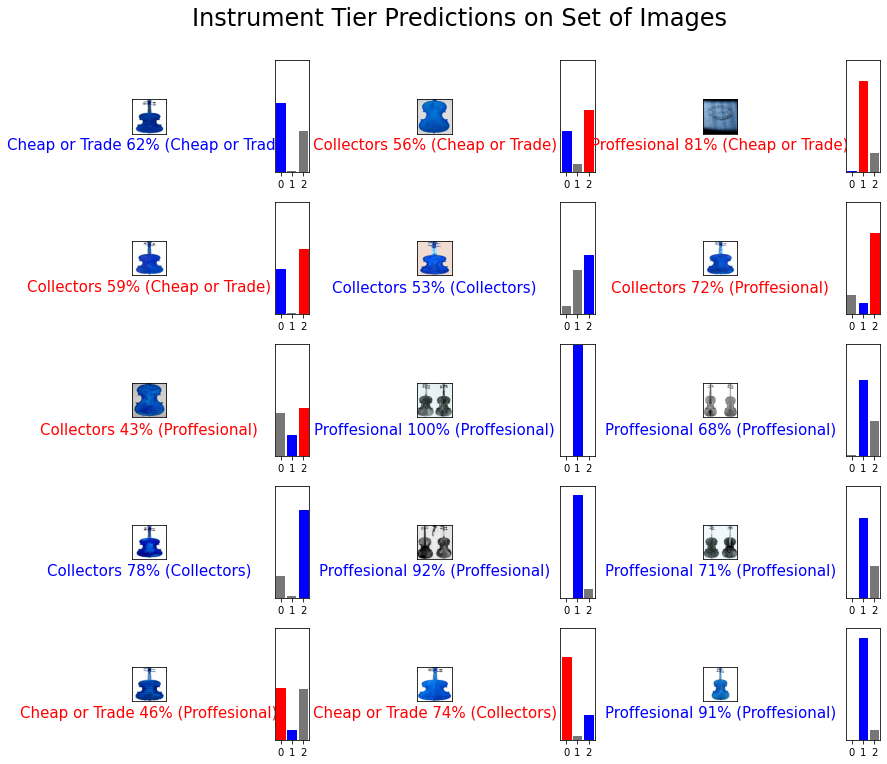

In [70]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
fig=plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], index_list, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], index_list)
plt.tight_layout()
fig.suptitle('Instrument Tier Predictions on Set of Images', fontsize=24, y=1.06)
plt.show()

## Data Augmentation End

## Alex code from scratch no photo estimator

In [33]:
# # from sklearn import preprocessing 
# from sklearn.preprocessing import MinMaxScaler, LabelBinarizer, Binarizer

# def process_df(df):
#     year_made = ['Year Made']
#     price=['Current Value']
#     global cs
#     cs = MinMaxScaler()
#     year_made_scaled = cs.fit_transform(df[year_made])
#     global scaler
#     scaler = MinMaxScaler()
#     price_scaled=scaler.fit_transform(df[price])
#     categorigal=['Instrument Type', 'Country Made',"Tier"]
#     df_categorical = pd.get_dummies(df[categorigal])
#     print(df_categorical.shape)
#     df_categorical['Year Made'] = pd.Series(year_made_scaled.flatten())
#     df_categorical['Current Value'] = pd.Series(price_scaled.flatten())
#     df_categorical['Image Array']=all_strings['Image Array']
#     return df_categorical
# processed_df=process_df(all_strings)
# processed_df.shape
# processed_df.head()

## processed_df.dropna(axis='Current Value')
## processed_df = processed_df[processed_df['Current Value'].isnull()==False]

## x=np.asarray(processed_df.values.tolist())
## y=np.asarray(X_vc['Current Value'] / X_vc['Current Value'].max() )

#x=np.stack(processed_df['Image Array'].values.tolist(), axis=0)

# y=np.asarray(processed_df['Current Value'])
#y=np.asarray(processed_df['Tier'])

# split = train_test_split( x, y , test_size=0.10, random_state=32)
# # (y_train, y_test, x_train, x_test) = split
# # (x_test, y_test, x_train, y_train)=split
# ( x_train, y_train, x_test, y_test)=split

## Data Visualizations

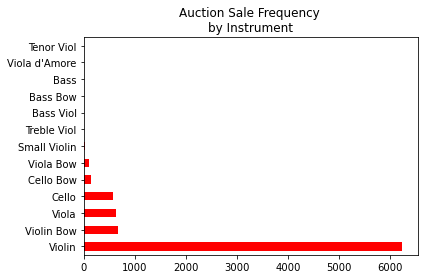

In [34]:
# processed_df.iloc[:,2].hist(bins=20)
# dftrain.sex.value_counts().plot(kind='barh')
all_df.iloc[:,0].value_counts().plot(kind='barh',color='red', title="Auction Sale Frequency \nby Instrument")
plt.savefig('Auction Sale Frequency by Instrument.png')

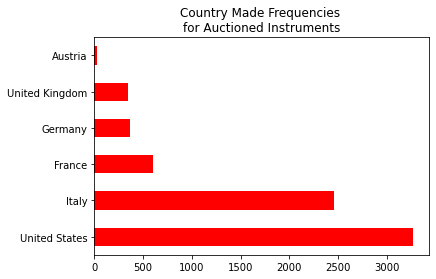

In [35]:
#One thing interesting to notice is how few German instruments account for auction sales. From the late 19th century to World War 2, tens of thoousands of crappy trade instruments were made in Germany. These instruments seem to rarely sell at auction.
no_negative=all_df.loc[all_df['Country Made'] != '-1']
no_negative.iloc[:,1].value_counts().plot(kind='barh',color='red',title="Country Made Frequencies \nfor Auctioned Instruments")
plt.savefig('Country Made Frequencies for Auctioned Instruments.png')

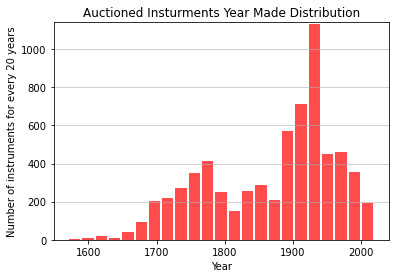

In [36]:
no_2021_df=all_df.copy()
no_2021_df.drop(no_2021_df[no_2021_df['Year Made'] <1500].index, inplace = True) 
no_2021_df.drop(no_2021_df[no_2021_df['Year Made'] ==2021].index, inplace = True) 
# df.drop(df[df['Age'] < 25].index, inplace = True) 
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=no_2021_df.iloc[:,2], bins=23, color='red',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Year')
plt.ylabel('Number of instruments for every 20 years')
plt.title('Auctioned Insturments Year Made Distribution')
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
# We see two major drops and rises. The first is the sharp decline of the Italian violin trade over time. The second decline is the horrors of world war two on Europe
#Text to insert next to the image_ Notice how the bimodal distribution of data matches the theory of the old and new schools of violin making.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.savefig('Auctioned Insturments Year Made Distribution.png')

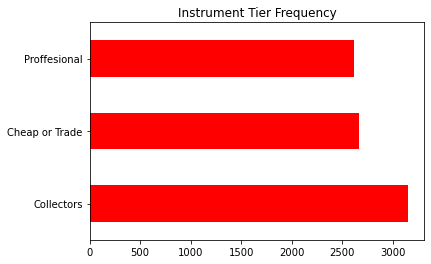

In [37]:
all_df.iloc[:,-1].value_counts().plot(kind='barh',color='red', title="Instrument Tier Frequency")
plt.savefig('Instrument Tier Frequency.png')

In [38]:
all_df['Current Value'].describe()

count    8.429000e+03
mean     1.862824e+05
std      7.246243e+05
min      1.710000e+02
25%      7.886000e+03
50%      2.428700e+04
75%      1.059970e+05
max      1.450447e+07
Name: Current Value, dtype: float64

In [39]:
#price histogram of data
no_expensive_df=all_df.copy()
no_expensive_df.drop(no_expensive_df[no_expensive_df['Current Value'] >100000].index, inplace = True)
# no_2021_df.drop(no_2021_df[no_2021_df['Year Made'] <1500].index, inplace = True) 

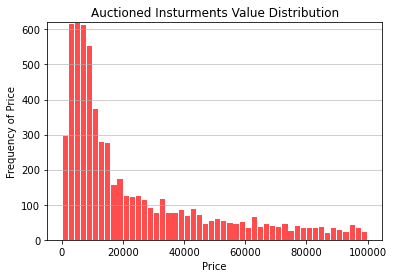

In [40]:
n, bins, patches = plt.hist(x=no_expensive_df['Current Value'], bins=50, color='red',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Frequency of Price')
# plt.ticklabel_format(style='plain')
# plt.ticklabel_format(useOffset=False)
plt.title('Auctioned Insturments Value Distribution')
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
# We see two major drops and rises. The first is the sharp decline of the Italian violin trade over time. The second decline is the horrors of world war two on Europe
#Text to insert next to the image_ Notice how the bimodal distribution of data matches the theory of the old and new schools of violin making.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.savefig('Auctioned Insturments Value Distribution.png')

In [41]:
import seaborn as sns

In [42]:
no_2021_df["Current Value"].max()

14504468

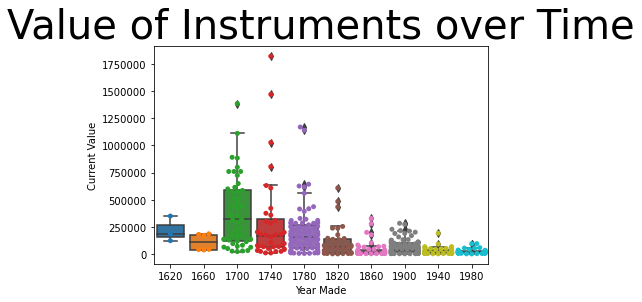

In [43]:
# ax = sns.violinplot(x="Year Made", y="Current Value", data=no_2021_df, order=[1620, 1660, 1700, 1740, 1780, 1820, 1860, 1900, 1940, 1980])
ax = sns.boxplot(x="Year Made", y="Current Value", data=no_2021_df, order=[1620, 1660, 1700, 1740, 1780, 1820, 1860, 1900, 1940, 1980])
ax = sns.swarmplot(x="Year Made", y="Current Value", data=no_2021_df, order=[1620, 1660, 1700, 1740, 1780, 1820, 1860, 1900, 1940, 1980]).set_title('Value of Instruments over Time', fontsize=40)
plt.rcParams["axes.labelsize"] = 15  
plt.ticklabel_format(style='plain', axis='y')

In [44]:
# only_bows=all_df.loc[(all_df['Instrument Type'] == 'Violin Bow') | (all_df['Instrument Type'] == 'Cello Bow')| (all_df['Instrument Type'] == 'Bass Bow')| (all_df['Instrument Type'] == 'Viola Bow')]
# only_bows=only_bows.loc[only_bows['Year Made'] < 2020]
# ax = sns.boxplot(x="Year Made", y="Current Value", data=only_bows, order=[1620, 1660, 1700, 1740, 1780, 1820, 1860, 1900, 1940, 1980])
# ax = sns.swarmplot(x="Year Made", y="Current Value", data=only_bows, order=[1620, 1660, 1700, 1740, 1780, 1820, 1860, 1900, 1940, 1980]).set_title('Value of Instruments over Time', fontsize=40)
# plt.rcParams["axes.labelsize"] = 15  
# plt.ticklabel_format(style='plain', axis='y')

In [45]:
# #price histogram of data
# n, bins, patches = plt.hist(x=processed_df['Current Value'], bins=23, color='red',
#                             alpha=0.7, rwidth=0.85)
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel('Price')
# plt.ylabel('Frequency of Price')
# plt.title('Normalized Data Auctioned Insturments Value Distribution Processed')
# # plt.text(23, 45, r'$\mu=15, b=3$')
# maxfreq = n.max()
# # Set a clean upper y-axis limit.
# # We see two major drops and rises. The first is the sharp decline of the Italian violin trade over time. The second decline is the horrors of world war two on Europe
# #Text to insert next to the image_ Notice how the bimodal distribution of data matches the theory of the old and new schools of violin making.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)